# MD004 ENTREGA8 NAIVE BAYES & ANÁLISIS DE SENTIMIENTO


###### **Trabajo del Tema 8**

**Descripción de la tarea:**

El csv adjunto incluye reviews que han dejado usuarios en la Google Play Store en referencia a 23 apps, incluyendo una valoración categórica sobre el análisis de sentimiento. Los datos son los siguientes:

- package_name: Nombre de la app
- review: Texto del usuario con la review
- polarity: Sentimiento de polaridad de la review:
    - 1: Review con un sentimiento muy positivo o muy negativo
    - 0: Review con un sentimiento neutro (-->realizo una pequeña corrección, el enunciado ponía '2')

**Se pide:**

1. **Limpieza de instancias (3.5p)**: Limpieza de texto de las instancias. Se valorará el uso de las técnicas empleadas y las explicaciones en el notebook
2. **Creación de modelo clasificador de Naive Bayes (3.5p)**: Se valorará el uso de técnicas empleadas como el split entre entrenamiento y validación y selección de métrica de optimización
3. **Optimización del modelo (2p)**: En base a los resultados obtenidos, ¿Somos capaces de mejorar nuestro modelo? Se valorará el uso de ténicas como Laplace smoothing, uso de 
la variable categórica package_name
4. **Conclusiones y vías abiertas (1p)**: ¿Qué resultados obtenemos en el modelo?, ¿Predice correctamente?, ¿En todas las apps?, ¿Qué datos podrían ayudarnos a mejorar la predicción?

**>> este ejercicio no tiene una solución única<<** Muchas opciones pueden ser válidas, pero se espera que se haga una interpretación de los datos obtenidos en todos los puntos y que se construya un modelo de Naive Bayes acorde a lo analizado (Si la clasificación es válida, por qué lo es y si no llega a serlo, por qué no lo es y cómo podrían mejorarse los resultados)

<font color='red'> **Entrega: fichero Jupyter Notebook con MD004NombreApellidosAC08.ipynb y fichero .pdf con MD004NombreApellidosAC08.pdf** </font>

In [164]:
library(tidyverse)
library(FSelectorRcpp)
library(caret)
library(ggplot2)
library(GGally)
library(gridExtra)
library(olsrr)
library(tidyverse)
library(caret)
library(lmtest)
library(gridExtra)
library(broom)
library(dplyr)
library(corrplot)
library(rlang)
library(e1071)
library(tm)
library(SnowballC)
library(wordcloud)
library(gmodels)

In [165]:
data = read.csv(file='sentiment_dataset.csv', header=TRUE, sep=',', dec='.', encoding = "UTF-8")

In [166]:
head(data)
tail(data)


,package_name,review,polarity
,<chr>,<chr>,<int>
1,com.facebook.katana,privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online.,0
2,com.facebook.katana,"messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app.",0
3,com.facebook.katana,profile any time my wife or anybody has more than one post and i view them it would take me to there profile so that i can view them all at once. now when i try to view them it tells me that the page that i requested is not available. i've restarted my phone i even cleard the cache and i've uninstalled and reinstalled the app and it is still doing it. please fix it thank you,0
4,com.facebook.katana,the new features suck for those of us who don't have a working back button can you guys make the videos able to be slid to the left to exit the video. as i have to force close facebook to exit,0
5,com.facebook.katana,"forced reload on uploading pic on replying comment last night i tried to reply a comment by uploading a photo from my phone. when i press on the button to select photos the app automatically goes back to the main page. on other occasions, i could enter to my gallery to select my image but as soon as i selected an image and press done, the program, again, forced reload and suddenly go back to the main page. please fix this and i will change my rating. thank you.",0
6,com.facebook.katana,"idk i can't edit my posts? things such as my profile picture, when i edit it, it becomes grey and says that it is no longer available. please fix. i have an htc desire. will rate 5 stars shown fixed đ",0


,package_name,review,polarity
,<chr>,<chr>,<int>
886,com.rovio.angrybirds,too many ads far more adverts than any other game i've played. i know it's free and they need the ads to make a profit but there needs to be a balance.,1
887,com.rovio.angrybirds,loved it i loooooooooooooovvved it because it is incredible awesome and it's in go power and make a new clash of clans the same thing butt better,1
888,com.rovio.angrybirds,all time legendary game the birthday party levels and short fuse levels are fantastic.especially when the pigs crash onto different chemicals is just great.suggestion to all those players who cringe about too much ads is close ur wi-fi connection and then play the game.then the ads won't trouble you.,1
889,com.rovio.angrybirds,"ads are way to heavy listen to the bad reviews. there are ads after every round, whether you pass it or fail it. sometimes there are ads before the next round starts to. you spend more time on ads than game play. i develop web apps, and honestly many people rely on ads to make a living. i can appreciate that all to well. however, these developers have went far beyond that. frankly, they are disrespectful nitwits.",0
890,com.rovio.angrybirds,"fun works perfectly well. ads aren't as annoying as you think, especially for a free game.",1
891,com.rovio.angrybirds,they're everywhere i see angry birds everywhere because i can't stop playing this game. get out my head devs! 4 đ because nothing's perfect,1


## <font color='#3d59c6'>  TRANSFORMACIÓN Y LIMPIEZA DEL DATASET </font>

In [167]:
table(data$package_name)


        com.android.chrome        com.dropbox.android 
                        39                         40 
              com.evernote        com.facebook.katana 
                        40                         40 
         com.facebook.orca    com.google.android.talk 
                        40                         39 
         com.hamrokeyboard             com.hamropatro 
                        39                         38 
     com.imangi.templerun2    com.king.candycrushsaga 
                        40                         40 
      com.linkedin.android      com.opera.mini.native 
                        40                         40 
      com.rovio.angrybirds    com.shirantech.kantipur 
                        39                         36 
                 com.Slack com.supercell.clashofclans 
                        40                         40 
            com.tencent.mm        com.twitter.android 
                        39                         39 
         

Clases proporcionadas, excepto el paquete de jabanaki.todo.todoly. Vamos a ver si hay nulos o celdas vacías

In [168]:
any(is.na(data))

[1] FALSE

No tenemos nulos, ahora vamos a contar los caracteres que tenemos en las descripciones para ver más o menos el tamaño de los textos.

In [169]:
data$text_count <- nchar(data$review)
head(data)
summary(data)

,package_name,review,polarity,text_count
,<chr>,<chr>,<int>,<int>
1,com.facebook.katana,privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online.,0,386
2,com.facebook.katana,"messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app.",0,457
3,com.facebook.katana,profile any time my wife or anybody has more than one post and i view them it would take me to there profile so that i can view them all at once. now when i try to view them it tells me that the page that i requested is not available. i've restarted my phone i even cleard the cache and i've uninstalled and reinstalled the app and it is still doing it. please fix it thank you,0,378
4,com.facebook.katana,the new features suck for those of us who don't have a working back button can you guys make the videos able to be slid to the left to exit the video. as i have to force close facebook to exit,0,193
5,com.facebook.katana,"forced reload on uploading pic on replying comment last night i tried to reply a comment by uploading a photo from my phone. when i press on the button to select photos the app automatically goes back to the main page. on other occasions, i could enter to my gallery to select my image but as soon as i selected an image and press done, the program, again, forced reload and suddenly go back to the main page. please fix this and i will change my rating. thank you.",0,466
6,com.facebook.katana,"idk i can't edit my posts? things such as my profile picture, when i edit it, it becomes grey and says that it is no longer available. please fix. i have an htc desire. will rate 5 stars shown fixed đ",0,204


 package_name          review             polarity        text_count   
 Length:891         Length:891         Min.   :0.0000   Min.   :  6.0  
 Class :character   Class :character   1st Qu.:0.0000   1st Qu.:145.0  
 Mode  :character   Mode  :character   Median :0.0000   Median :210.0  
                                       Mean   :0.3446   Mean   :231.9  
                                       3rd Qu.:1.0000   3rd Qu.:292.5  
                                       Max.   :1.0000   Max.   :910.0  

In [170]:
table(data$polarity)
# Proporción de clases
round(prop.table(table(data$polarity))*100, digits = 1)


  0   1 
584 307 


   0    1 
65.5 34.5 

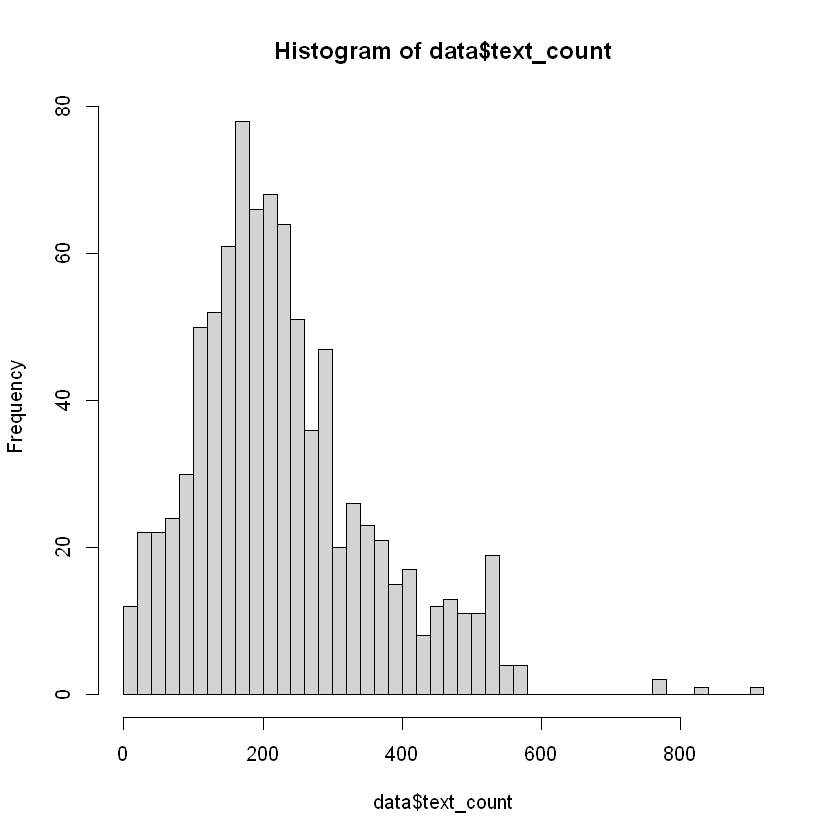

In [171]:
hist(data$text_count,breaks = 50)

Vemos un poco la distribución de nuestros datos, y vemos como hay muchas mas reviews con impacto neutral.

A continuación vamos a tratar un poco más la columna de reviews.
Nuestro objetivo en este punto será crear un mapa de palabras, analizar qué palabras se repiten más, etc 
Lo primero que haremos será aplicar la función VectorSource() esto nos tratará cada fila como si fuese un documento. Luego con VCorpus() alamcenaremos esta colección de "datos" (documentos).

**VENTAJAS**

- A nivel computacional los datos se guardan en la memoria, por lo que computacionalmente es más eficiente
- El tipo de almacenamiento corpus tiene funciones que nos permiten manipular textos de una forma eficiente con funciones predefinidas

In [172]:
data_corpus = VCorpus(VectorSource(data$review),readerControl = list(language = 'es'))
print(data_corpus)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 891


In [173]:
# Esta transformación cambia todas las mayúsculas a minúsculas
data_corpus_clean = tm_map(data_corpus, content_transformer(tolower))
# Visualización de la instancia antes y después de la transformación
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."



In [174]:
# Esta transformación retira números y palabras conectoras de lenguaje y a texto plano
data_corpus_clean = tm_map(data_corpus_clean, removeNumbers) 
data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords("english"))

# Visualización de la instancia antes y después de la transformación
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

$content
[1] " privacy  least put  option appear offline.  mean   people like    big pressure   seen online like  need  response  every message  else   called seenzone .    wanna   facebook   read   newsfeed  just wanna response  message  want . pls reconsidered  review.  tried  turn  chat  still can see   online."



In [175]:
#Eliminamos los signos de puntuación
data_corpus_clean <- tm_map(data_corpus_clean, removePunctuation)
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

$content
[1] " privacy  least put  option appear offline  mean   people like    big pressure   seen online like  need  response  every message  else   called seenzone     wanna   facebook   read   newsfeed  just wanna response  message  want  pls reconsidered  review  tried  turn  chat  still can see   online"



In [176]:
# sustituye puntuaciones por espacios
replacePunctuation = function(x) {gsub('[[:punct:]]', ' ', x)}

data_corpus_clean = tm_map(data_corpus_clean, replacePunctuation)
# Visualización de la instancia antes y después de la transformación
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

[[1]]
[1] " privacy  least put  option appear offline  mean   people like    big pressure   seen online like  need  response  every message  else   called seenzone     wanna   facebook   read   newsfeed  just wanna response  message  want  pls reconsidered  review  tried  turn  chat  still can see   online"



In [177]:
#Creamos una función que sustituya las letras con acentos por letras sin acentos
# Como estamos en ingles, no debería de haber acentos, todo y que puede ser que se usen palabras procedentes de otros países y que los angloparlantes conserven los acentos

removeAccents = function(x) chartr('àáèéìíòóùú', 'aaeeiioouu', x)
data_corpus_clean = tm_map(data_corpus_clean, removeAccents)
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

[[1]]
[1] " privacy  least put  option appear offline  mean   people like    big pressure   seen online like  need  response  every message  else   called seenzone     wanna   facebook   read   newsfeed  just wanna response  message  want  pls reconsidered  review  tried  turn  chat  still can see   online"



In [178]:
#Elimina los dobles espacios y los sustituye por un solo espacio
data_corpus_clean = tm_map(data_corpus_clean, stripWhitespace)
# Visualización de la instancia antes y después de la transformación
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

[[1]]
[1] " privacy least put option appear offline mean people like big pressure seen online like need response every message else called seenzone wanna facebook read newsfeed just wanna response message want pls reconsidered review tried turn chat still can see online"



A través de tm_map podemos invocar a la función **stemDocument** con el objetivo de unificar aquellos términos que aportan la misma información (tienen la misma base semántica)

In [179]:
data_corpus_clean = tm_map(data_corpus_clean, stemDocument, language = 'en')
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

[[1]]
[1] "privaci least put option appear offlin mean peopl like big pressur seen onlin like need respons everi messag els call seenzon wanna facebook read newsfe just wanna respons messag want pls reconsid review tri turn chat still can see onlin"



In [180]:
# especificando un vector de palabras comunes a ser eliminadas
#Se han escogido las 10 palabras más usadas, los 5 verbos y los 5 sustantivos
data_corpus_clean = tm_map(data_corpus_clean, removeWords, c('the', 'be','to','of','and','a','in','that','have','I','do','say','get','time','person','year','way','day'))

In [181]:
#Transforma a documentos de texto plano
data_corpus_clean = tm_map(data_corpus_clean, PlainTextDocument)

In [182]:
for (i in (1:5))
{
    print(paste0("subject number ", i))
    print(lapply(data_corpus[[i]][1], as.character))
    print(lapply(data_corpus_clean[[i]][1], as.character))
}

[1] "subject number 1"
$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

$content
[1] "privaci least put option appear offlin mean peopl like big pressur seen onlin like need respons everi messag els call seenzon wanna facebook read newsfe just wanna respons messag want pls reconsid review tri turn chat still can see onlin"

[1] "subject number 2"
$content
[1] " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens 

## <font color='#3d59c6'> LO MISMO PERO DECLARANDO UNA FUNCIÓN </font>

Se incluye la función stemDocument >> A través de tm_map podemos invocar a la función stemDocument con el objetivo de unificar aquellos términos que aportan la misma información (tienen la misma base semántica)

In [183]:
replacePunctuation = function(x) {gsub('[[:punct:]]', ' ', x)}
removeAccents = function(x) chartr('àáèéìíòóùú', 'aaeeiioouu', x)

#después de llegar al dataframe, nos hemos dado cuenta de que tenemos que eliominar caracteres especiales, con la función de abajo, simplemente nos quedaremos con minisculas
#que es lo mismo que eliminar los emojis y todo lo especial
keepOnlyLetters <- function(x) gsub("[^a-z]", " ", x)

clean_corpus = function(corpus){
               data_corpus_clean = tm_map(corpus, content_transformer(tolower))
               data_corpus_clean = tm_map(data_corpus_clean, removeNumbers)   
               data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords('english'))
               data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords())        
               data_corpus_clean = tm_map(data_corpus_clean, removePunctuation)     
               data_corpus_clean = tm_map(data_corpus_clean, replacePunctuation)    
               data_corpus_clean = tm_map(data_corpus_clean, removeAccents)    
               data_corpus_clean = tm_map(data_corpus_clean, stripWhitespace)      
               data_corpus_clean = tm_map(data_corpus_clean, removeWords, c('the', 'be','to','of','and','a','in','that','have','I','do','say','get','time','person','year','way','day'))   
               data_corpus_clean = tm_map(data_corpus_clean, stemDocument, 'english')   
               data_corpus_clean = tm_map(data_corpus_clean, PlainTextDocument)   
  return(data_corpus_clean)
}
clean_corpus2 = function(corpus){
               data_corpus_clean = tm_map(corpus, content_transformer(tolower))
               data_corpus_clean = tm_map(corpus, keepOnlyLetters) 
               data_corpus_clean = tm_map(data_corpus_clean, removeNumbers)   
               data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords('english'))
               data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords())        
               data_corpus_clean = tm_map(data_corpus_clean, removePunctuation)     
               data_corpus_clean = tm_map(data_corpus_clean, replacePunctuation)    
               data_corpus_clean = tm_map(data_corpus_clean, removeAccents)    
               data_corpus_clean = tm_map(data_corpus_clean, stripWhitespace)   
               data_corpus_clean = tm_map(data_corpus_clean, stemDocument, 'english')   
               data_corpus_clean = tm_map(data_corpus_clean, PlainTextDocument) 
               
               #Esta linea se ha ido modificando a medida que se ha ido viendo el dataset
               data_corpus_clean = tm_map(data_corpus_clean, removeWords, c('the', 'be','to','of','and','a','in',
              'use ',' use','app ','that','have','I','do','say','get','time','person','year','way','day','app','use','game', 'can'))    
               
  return(data_corpus_clean)
}


In [184]:
data_corpus = VCorpus(VectorSource(data$review),readerControl = list(language = 'en'))
data_corpus_clean = clean_corpus(data_corpus) 
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

$content
[1] "privaci least put option appear offlin mean peopl like big pressur seen onlin like need respons everi messag els call seenzon wanna facebook read newsfe just wanna respons messag want pls reconsid review tri turn chat still can see onlin"



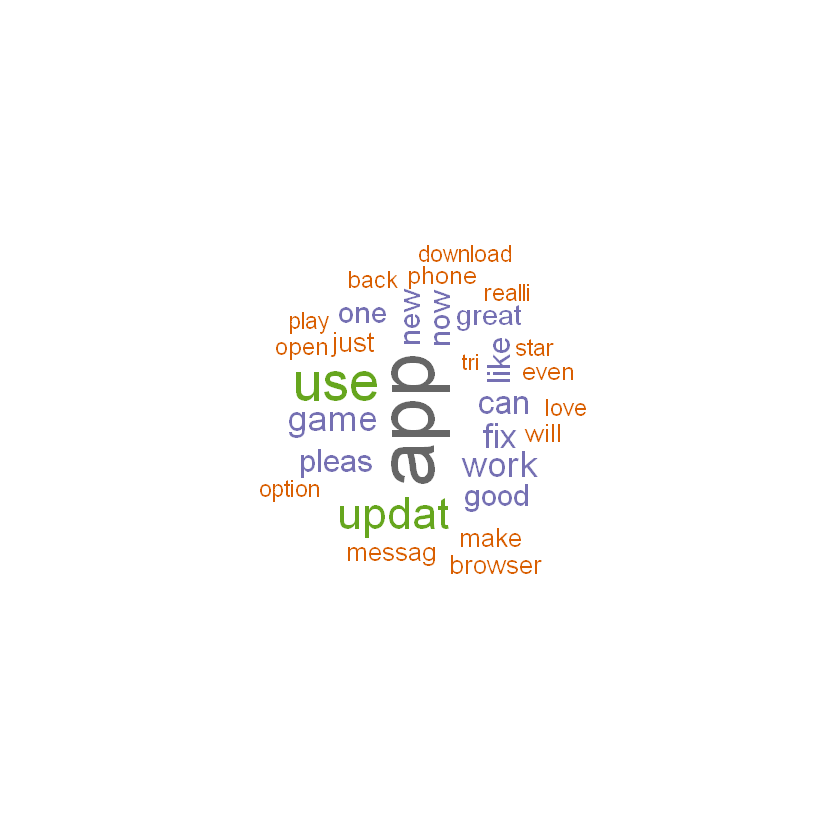

In [185]:
wordcloud(data_corpus_clean, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

Vemos que app es muy usada, y tiene sentido puesto que son reviews de aplicación, así pues, está palabra se ha deciddido eliminarla. Además, estamos analizando el sentimiento. por lo tanto también eliminaremos use, ya puede encontrarse tanto en aspectos positivos, negativos o neutrales. También eliminaremos game, ya que si que es verdad que hay aplicaciones que no son juegos, pero debido a la intención de nuestro analisis donde necesitamos analizar el sentimiento, game no aporta una connotación clara. Debido a que tambien nos hemos quedado con la raiz. La palabra can ha dejado de aportar informacion, ya que no sabemos si es can't o can, por lo tanto, también la eliminaremos.

In [186]:
data_corpus2 = VCorpus(VectorSource(data$review),readerControl = list(language = 'en'))
data_corpus_clean2 = clean_corpus2(data_corpus2) 
print(lapply(data_corpus2[[1]][1], as.character))
print(lapply(data_corpus_clean2[[1]][1], as.character))

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

$content
[1] "privaci least put option appear offlin mean peopl like s big pressur seen onlin like need respons everi messag els call seenzon wanna facebook read newsfe just wanna respons messag want pls reconsid review tri turn chat still  see onlin"



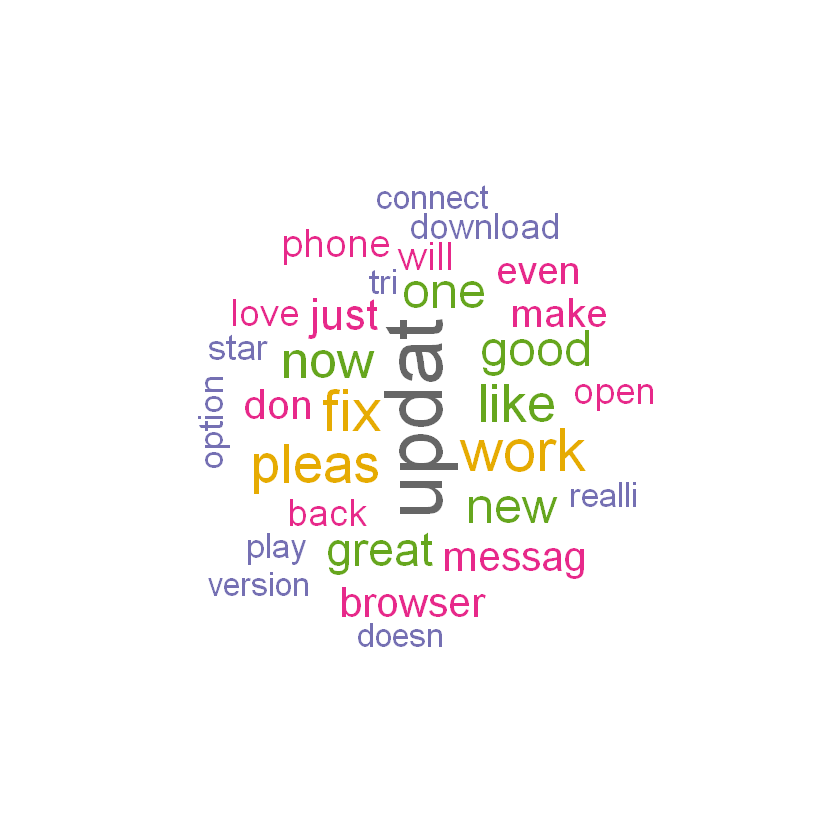

In [187]:
wordcloud(data_corpus_clean2, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

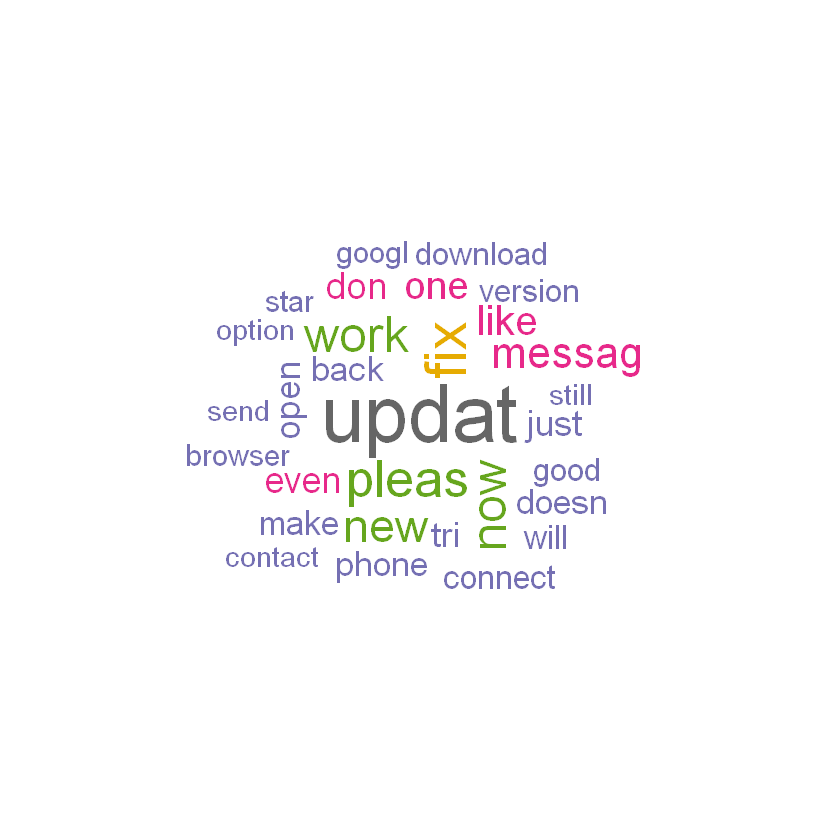

In [188]:
data_subset_0 = subset(data, data$polarity == 0)
data_corpus_0 = VCorpus(VectorSource(data_subset_0$review),readerControl = list(language = 'es'))
data_corpus_clean_0 = clean_corpus2(data_corpus_0) 

wordcloud(data_corpus_clean_0, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

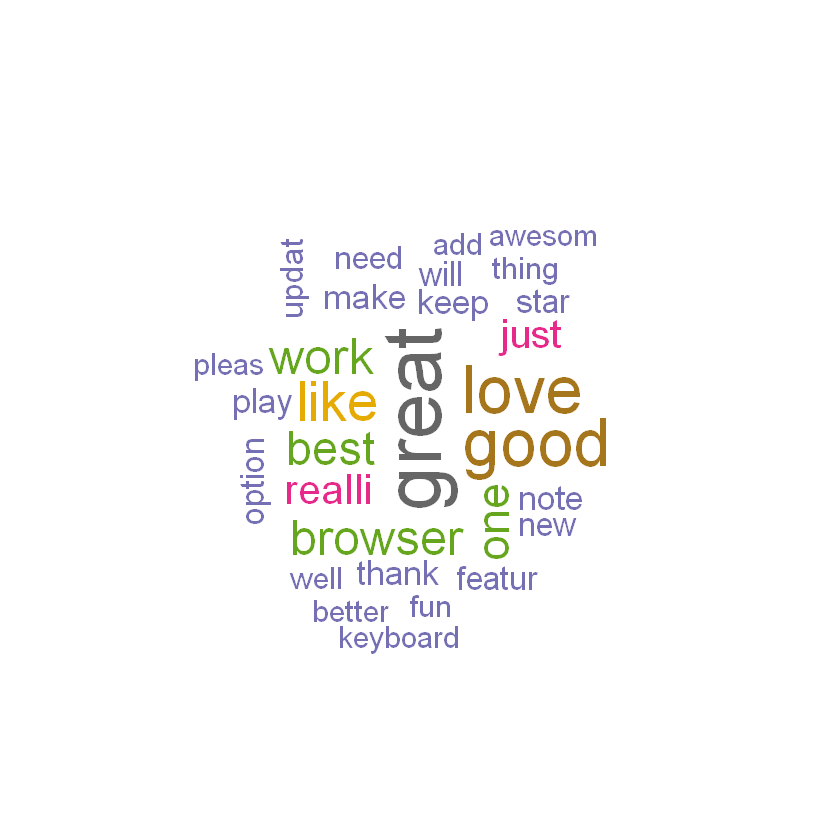

In [189]:
data_subset_1 = subset(data, data$polarity == 1)
data_corpus_1 = VCorpus(VectorSource(data_subset_1$review),readerControl = list(language = 'es'))
data_corpus_clean_1 = clean_corpus2(data_corpus_1) 

wordcloud(data_corpus_clean_1, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

Aún así, vemos como aún se nos han filtrado palabras que no queremos (app, use). Así pues después, cuando tengamos el dataframe ya haremos una segunda limpieza.

## <font color='#3d59c6'>  SEPARACIÓN TRAIN & TEST </font>

Ahora transformaremos cada mensaje en palabras independientes para construir la estructura del análisis mediante una matrix compuesta por:

- Las columnas son la unión de todas las palabras definidas en el corpus
- Las filas son cada una de las instancias de los mensajes tal y como viene definido en el dataset entrante
- Los valores son el número de veces que se repite cada palabra en cada mensaje

La matriz generada estará compuesta principalmente de instancias de valor 0. La función *DocumentTermMatrix* nos ayudará a generar este conjunto.

In [190]:
print(lapply(data_corpus_clean2[[1]][1], as.character))

$content
[1] "privaci least put option appear offlin mean peopl like s big pressur seen onlin like need respons everi messag els call seenzon wanna facebook read newsfe just wanna respons messag want pls reconsid review tri turn chat still  see onlin"



In [191]:
dtm = DocumentTermMatrix(data_corpus_clean2)
dtm

<<DocumentTermMatrix (documents: 891, terms: 2630)>>
Non-/sparse entries: 15635/2327695
Sparsity           : 99%
Maximal term length: 24
Weighting          : term frequency (tf)

In [192]:
str(dtm)

List of 6
 $ i       : int [1:15635] 1 1 1 1 1 1 1 1 1 1 ...
 $ j       : int [1:15635] 121 240 336 383 716 765 810 1220 1279 1299 ...
 $ v       : num [1:15635] 1 1 1 1 1 1 1 1 1 2 ...
 $ nrow    : int 891
 $ ncol    : int 2630
 $ dimnames:List of 2
  ..$ Docs : chr [1:891] "character(0)" "character(0)" "character(0)" "character(0)" ...
  ..$ Terms: chr [1:2630] "aafnaii" "aakhirat" "aalikati" "aap" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


In [193]:
colnames(dtm)

[1] "aafnaii"                  "aakhirat"                
   [3] "aalikati"                 "aap"                     
   [5] "aapsssssss"               "aaru"                    
   [7] "abil"                     "abk"                     
   [9] "abl"                      "absolut"                 
  [11] "absurd"                   "acc"                     
  [13] "acceces"                  "accept"                  
  [15] "acces"                    "access"                  
  [17] "accid"                    "accomplish"              
  [19] "accord"                   "accordion"               
  [21] "account"                  "accumul"                 
  [23] "accur"                    "achiev"                  
  [25] "achiv"                    "across"                  
  [27] "act"                      "action"                  
  [29] "activ"                    "actual"                  
  [31] "adag"                     "adblock"                 
  [33] "add"                      "addict"                  
  [35] "addit"                    "addon"                   
  [37] "address"                  "adequ"                   
  [39] "adjust"                   "admin"                   
  [41] "admit"                    "advanc"                  
  [43] "advantag"                 "adventur"                
  [45] "advert"                   "advertis"                
  [47] "advic"                    "advis"                   
  [49] "aesthet"                  "affect"                  
  [51] "affirm"                   "aficionado"              
  [53] "afloat"                   "afterward"               
  [55] "age"                      "agenda"                  
  [57] "agent"                    "aggres"                  
  [59] "ago"                      "agre"                    
  [61] "ahead"                    "ain"                     
  [63] "air"                      "airlin"                  
  [65] "akash"                    "album"                   
  [67] "alert"                    "ali"                     
  [69] "allahsubhanahutallah"     "allow"                   
  [71] "allreadi"                 "almost"                  
  [73] "alon"                     "along"                   
  [75] "alot"                     "alphabet"                
  [77] "alreadi"                  "alright"                 
  [79] "also"                     "alter"                   
  [81] "altern"                   "although"                
  [83] "altogeth"                 "alway"                   
  [85] "amaz"                     "ambienc"                 
  [87] "america"                  "american"                
  [89] "among"                    "amount"                  
  [91] "analys"                   "anchor"                  
  [93] "ancient"                  "android"                 
  [95] "aney"                     "angri"                   
  [97] "anim"                     "annapurna"               
  [99] "annoy"                    "anon"                    
 [101] "anoth"                    "anoy"                    
 [103] "answer"                   "anti"                    
 [105] "anurodh"                  "anwer"                   
 [107] "anybodi"                  "anymor"                  
 [109] "anyon"                    "anyth"                   
 [111] "anytim"                   "anyttim"                 
 [113] "anyway"                   "anywher"                 
 [115] "aosp"                     "apart"                   
 [117] "api"                      "apk"                     
 [119] "appar"                    "appeal"                  
 [121] "appear"                   "appl"                    
 [123] "appli"                    "appliat"                 
 [125] "applic"                   "appp"                    
 [127] "appreci"                  "approach"                
 [129] "appropri"                 "approv"                  
 [131] "aprrox"                   "aqu

Vemos que tenemos que limpiar más nuestro dataset, y eliminaremos todas las columnas que contengan \u. --> Ya no aplica al actual codigo.

In [194]:
#Establecemos las frecuencias de cada término sumando las columnas 
termFreq = colSums(as.matrix(dtm))
head(termFreq)

aafnaii   aakhirat   aalikati        aap aapsssssss       aaru 
         1          1          1          4          1          1

In [195]:
#Creamos el nuevo data set
tabla_frec = data.frame(term = names(termFreq), freq = termFreq)
head(tabla_frec)

,term,freq
,<chr>,<dbl>
aafnaii,aafnaii,1
aakhirat,aakhirat,1
aalikati,aalikati,1
aap,aap,4
aapsssssss,aapsssssss,1
aaru,aaru,1


In [196]:
#Ordenamos por frecuencias descendientes
tabla_frec = tabla_frec[order(-tabla_frec[,2]),]
head(tabla_frec)

,term,freq
,<chr>,<dbl>
updat,updat,248
work,work,177
fix,fix,172
pleas,pleas,157
like,like,154
now,now,147


In [197]:
#eliminamos el text count
data$text_count <- NULL

In [198]:
set.seed(555)
 
# Creamos el data partition de la función caret con un 70 - 30 split
inTrain <- createDataPartition(y = data$polarity
                                  , p = .70
                                  , list = FALSE
                                  , times = 1)
# Definitmos los datasets originales entre train y test
data.train<-data[inTrain,]
data.test<-data[-inTrain,]
# Revisamos el split
str(data.train)
str(data.test)

'data.frame':	624 obs. of  3 variables:
 $ package_name: chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...
 $ review      : chr  " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen"| __truncated__ " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app a"| __truncated__ " profile any time my wife or anybody has more than one post and i view them it would take me to there profile s"| __truncated__ " the new features suck for those of us who don't have a working back button can you guys make the videos able t"| __truncated__ ...
 $ polarity    : int  0 0 0 0 0 0 0 0 0 0 ...
'data.frame':	267 obs. of  3 variables:
 $ package_name: chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...
 $ review      : chr  " forced reload on uploading pic on replying comment last night i tried to reply a

In [199]:
data_corpus_clean2

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 891

In [200]:
# Separamos el corpus según la clase
corpus.train = data_corpus_clean2[inTrain]
corpus.test  = data_corpus_clean2[-inTrain]

# Y finalmente el Document term matrix
dtm.train = dtm[inTrain, ]
dtm.test  = dtm[-inTrain, ]

# Comprobamos que el desbalanceo de clases es el adecuado
print("Training")
round(prop.table(table(data.train$polarity))*100, 2)
print("Test")
round(prop.table(table(data.test$polarity))*100, 2)

[1] "Training"



    0     1 
66.19 33.81 

[1] "Test"



    0     1 
64.04 35.96 

In [201]:
#Encontramos todas las palabras que se repiten más de 3 veces
freq_terms = findFreqTerms(dtm.train, 3)
freq_terms

[1] "abil"        "abl"         "absolut"     "access"      "account"    
  [6] "achiev"      "action"      "activ"       "actual"      "add"        
 [11] "addict"      "addit"       "address"     "adjust"      "advertis"   
 [16] "ago"         "alert"       "allow"       "almost"      "along"      
 [21] "alreadi"     "also"        "although"    "alway"       "amaz"       
 [26] "among"       "amount"      "android"     "angri"       "annoy"      
 [31] "anoth"       "answer"      "anymor"      "anyon"       "anyth"      
 [36] "anytim"      "appeal"      "appear"      "appl"        "appli"      
 [41] "applic"      "appreci"     "aren"        "around"      "artifact"   
 [46] "asap"        "ask"         "aspect"      "asus"        "atleast"    
 [51] "attack"      "auto"        "automat"     "avail"       "averag"     
 [56] "away"        "awesom"      "awsom"       "back"        "background" 
 [61] "backup"      "bad"         "bait"        "bar"         "base"       
 [66] "basic"       "batteri"     "becom"       "begin"       "behind"     
 [71] "best"        "beta"        "better"      "big"         "bird"       
 [76] "bit"         "black"       "blank"       "block"       "bolt"       
 [81] "book"        "bookmark"    "boost"       "booster"     "bother"     
 [86] "bottom"      "box"         "break"       "brilliant"   "bring"      
 [91] "broke"       "broken"      "brows"       "browser"     "bug"        
 [96] "build"       "bullshit"    "busi"        "button"      "buy"        
[101] "cach"        "calendar"    "call"        "camera"      "candi"      
[106] "cant"        "cap"         "capit"       "card"        "care"       
[111] "caus"        "cell"        "certain"     "challeng"    "chanc"      
[116] "chang"       "channel"     "chat"        "check"       "chines"     
[121] "choic"       "choos"       "chrome"      "clan"        "clash"      
[126] "classic"     "cleaner"     "clear"       "click"       "clip"       
[131] "close"       "cloud"       "clutter"     "coc"         "code"       
[136] "color"       "colour"      "come"        "comment"     "compani"    
[141] "compar"      "compat"      "complain"    "complaint"   "complet"    
[146] "comput"      "con"         "concern"     "confus"      "connect"    
[151] "consid"      "constant"    "contact"     "content"     "continu"    
[156] "control"     "convers"     "cool"        "copi"        "correct"    
[161] "couldn"      "coupl"       "coz"         "crash"       "crazi"      
[166] "creat"       "cross"       "crush"       "current"     "custom"     
[171] "cut"         "daili"       "dark"        "data"        "date"       
[176] "dead"        "dear"        "decemb"      "decreas"     "default"    
[181] "definit"     "delay"       "delet"       "descript"    "design"     
[186] "desir"       "desktop"     "detect"      "dev"         "develop"    
[191] "devic"       "dial"        "didn"        "differ"      "difficult"  
[196] "direct"      "dis"         "disabl"      "disappear"   "disappoint" 
[201] "discov"      "display"     "document"    "doesn"       "doesnt"     
[206] "don"         "done"        "dont"        "doubt"       "download"   
[211] "drag"        "drive"       "droid"       "drop"        "dropbox"    
[216] "due"         "earlier"     "eas"         "easi"        "easili"     
[221] "edg"         "edit"        "either"      "els"         "email"      
[226] "emoji"       "emot"        "enabl"       "end"         "endors"     
[231] "engin"       "english"     "enjoy"       "enough"      "entir"      
[236] "epap"        "error"       "especi"      "essenti"     "etc"        
[241] "even"        "event"       "ever"        "everi"       "evernot"    
[246] "everyon"     "everyth"     "everytim"    "everywher"   "excel"      
[251] "except"      "exist"       "exit"        "expect"      "experi"     
[256] "extrem"      "face"        "facebook"    "facil"       "fact"       
[261] "fail"        "famili"      "fan"         "f

In [202]:
#Recortamos el data set con las palabras con una frecuencia superior a 3
freq_terms = findFreqTerms(dtm.train, 3)
reduced_dtm.train = DocumentTermMatrix(corpus.train, list(dictionary=freq_terms))
reduced_dtm.test = DocumentTermMatrix(corpus.test, list(dictionary=freq_terms))

#Revisamos cuantas columnas reducimos
ncol(dtm.train)
ncol(reduced_dtm.train)
ncol(dtm.test)
ncol(reduced_dtm.test)

[1] 2630

[1] 866

[1] 2630

[1] 866

## <font color='#3d59c6'>  CLASIFICADOR NAIVE BAYES </font>

Naive Bayes funciona con factores mientras que nuestra estructura DRT tiene valores numéricos. A continuación definimos una función que nos ayude a convertir números en factores y aplicarlo en las matrices reducidas:

In [204]:
head(reduced_dtm.train)

<<DocumentTermMatrix (documents: 6, terms: 866)>>
Non-/sparse entries: 113/5083
Sparsity           : 98%
Maximal term length: 11
Weighting          : term frequency (tf)

In [221]:
convert_counts = function(x) {
  x = ifelse(x > 0, 1, 0)
  x = factor(x, levels = c('0', '1'), labels=c("No", "Yes"))
  return (x)
}

# apply() allows us to work either with rows or columns of a matrix.
# MARGIN = 1 is for rows, and 2 for columns
reduced_dtm.train = apply(reduced_dtm.train, MARGIN=2, convert_counts)
reduced_dtm.test  = apply(reduced_dtm.test, MARGIN=2, convert_counts)

head(reduced_dtm.train)

,abil,abl,absolut,access,account,achiev,action,activ,actual,add,⋯,wouldn,write,wrong,wtf,wth,yahoo,yes,yet,youtub,zoom
character(0),Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,⋯,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
character(0),Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,⋯,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
character(0),Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,⋯,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
character(0),Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,⋯,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
character(0),Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,⋯,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
character(0),Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,⋯,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [226]:
# Almacena nuestro modelo en subject_classifier
subject_classifier <- naiveBayes(x = reduced_dtm.train,  # Dataset de entrenamiento
                                  y = data.train$polarity)  # Target de entrenamiento

# Realiza predicciones utilizando el modelo creado con los datos de entrenamiento
subject_test.predicted <- predict(subject_classifier,  # Modelo
                                  newdata = reduced_dtm.test)  # Dataset de test

In [223]:
subject_test.predicted

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0
Levels: 0 1

In [224]:
data.test$polarity

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 [75] 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
[149] 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1
[186] 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0
[223] 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[260] 1 1 1 1 1 1 1 1

In [225]:
# Ahora sacamos el confusion matrix
confusionMatrix(subject_test.predicted, data.test$polarity)

ERROR: Error: `data` and `reference` should be factors with the same levels.
